In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sys import exit
from matplotlib.backends.backend_pdf import PdfPages 
import matplotlib.dates as mdates
import seaborn as sns
from calendar import monthrange
import datetime
from tqdm import tqdm
import ast

In [2]:
# DataTable = pd.read_excel("../../Data/Electric Vehicle Charging Transactions/EV_CharginData.xlsx",sheet_name="ChargeData")
# DataTable = DataTable.loc[(DataTable['Total kWh'] > 0.1)]
# DataTable = DataTable.drop_duplicates(subset=['Total kWh','Chargepoint ID'])
# DataTable['Plug in Date and Time']= pd.to_datetime(DataTable['Plug in Date and Time'])
# DataTable['Unplug Date and Time']= pd.to_datetime(DataTable['Unplug Date and Time'])
# DataTable['Charge start Date and Time']= pd.to_datetime(DataTable['Charge start Date and Time'])
# DataTable['Charge end Date and Time']= pd.to_datetime(DataTable['Charge end Date and Time'])
# DataTable['ChargeLength(Minutes)'] = (DataTable['Charge end Date and Time'] - DataTable['Charge start Date and Time']).dt.seconds/60 # Seconds converted to minutes.
# DataTable['ChargeLength(Hours)'] = DataTable['ChargeLength(Minutes)']/60 # Minutes converted to hours.
# DataTable['ChargingPower(kW)'] = DataTable['Total kWh'] / DataTable['ChargeLength(Hours)'] # Average vehicle charge rate. kW charger.
# DataTable = DataTable.loc[(DataTable['ChargingPower(kW)'] < 150)] # Any charging power greater than 150kW is excluded.
# DataTable = DataTable.astype({'Charge Start - Year':'int','Charge Start - Month':'int','Charge Start - Day':'int',
#                               'Charge Start - Hour':'int','Charge Start - Minute':'int'})
# print(DataTable.info())
# DataTable.to_csv("../../Data/Electric Vehicle Charging Transactions/EV_CharginData.csv",index=False)

In [3]:
DataTable = pd.read_csv("0.DataSource/Electric Vehicle Charging Transactions/EV_CharginData.csv")
DataTable['Plug in Date and Time']= pd.to_datetime(DataTable['Plug in Date and Time'])
DataTable['Unplug Date and Time']= pd.to_datetime(DataTable['Unplug Date and Time'])
DataTable['Charge start Date and Time']= pd.to_datetime(DataTable['Charge start Date and Time'])
DataTable['Charge end Date and Time']= pd.to_datetime(DataTable['Charge end Date and Time'])
DataTable = DataTable.astype({'Charge Start - Year':'int','Charge Start - Month':'int','Charge Start - Day':'int',
                              'Charge Start - Hour':'int','Charge Start - Minute':'int'})
Datapoints = DataTable.shape[0]

In [4]:
DataTable

,Charging event,Chargepoint ID,Borough,Operator,Plug in Date and Time,Unplug Date and Time,Charge start Date and Time,Charge Start - Year,Charge Start - Month,Charge Start - Day,Charge Start - Hour,Charge Start - Minute,Charge end Date and Time,Total kWh,ChargeLength(Minutes),ChargeLength(Hours),ChargingPower(kW)
0,38462,6189,Barnet,CityEV,2021-03-31 14:30:00,2021-04-01 05:24:00,2021-03-31 14:30:00,2021,3,31,14,30,2021-04-01 05:24:00,32.276,894.000000,14.900000,2.166174
1,38463,6104,Barnet,CityEV,2021-03-31 18:14:00,2021-04-01 05:31:00,2021-03-31 18:14:00,2021,3,31,18,14,2021-03-31 23:36:00,17.832,322.000000,5.366667,3.322733
2,38468,6169,Barnet,CityEV,2021-04-01 07:49:00,2021-04-01 17:14:00,2021-04-01 07:49:00,2021,4,1,7,49,2021-04-01 12:59:00,14.417,310.000000,5.166667,2.790387
3,38512,6188,Barnet,CityEV,2021-04-01 10:32:00,2021-04-01 13:36:00,2021-04-01 10:32:00,2021,4,1,10,32,2021-04-01 13:36:00,8.916,184.000000,3.066667,2.907391
4,38526,6118,Barnet,CityEV,2021-04-01 16:07:00,2021-04-01 19:26:00,2021-04-01 16:08:00,2021,4,1,16,8,2021-04-01 19:16:00,8.383,188.000000,3.133333,2.675426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,113128,6133,LB Barnet,CityEV,2022-03-31 19:01:50,2022-04-01 07:03:55,2022-03-31 19:01:51,2022,3,31,19,1,2022-04-01 04:26:35,32.327,564.733333,9.412222,3.434577
4993,113137,6113,LB Barnet,CityEV,2022-03-31 23:26:14,2022-04-01 07:18:07,2022-03-31 23:26:15,2022,3,31,23,26,2022-04-01 07:17:43,28.017,471.466667,7.857778,3.565512
4994,113174,6168,LB Barnet,CityEV,2022-03-31 17:45:04,2022-04-01 08:53:54,2022-03-31 17:45:06,2022,3,31,17,45,2022-04-01 08:53:44,10.150,908.633333,15.143889,0.670237
4995,113209,6118,LB Barnet,CityEV,2022-03-31 18:49:28,2022-04-01 10:03:44,2022-03-31 18:49:29,2022,3,31,18,49,2022-04-01 00:00:24,17.169,310.916667,5.181944,3.313235


In [5]:
Datapoints

4997

In [17]:
# # For changing fontsizes.
# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12
# #
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

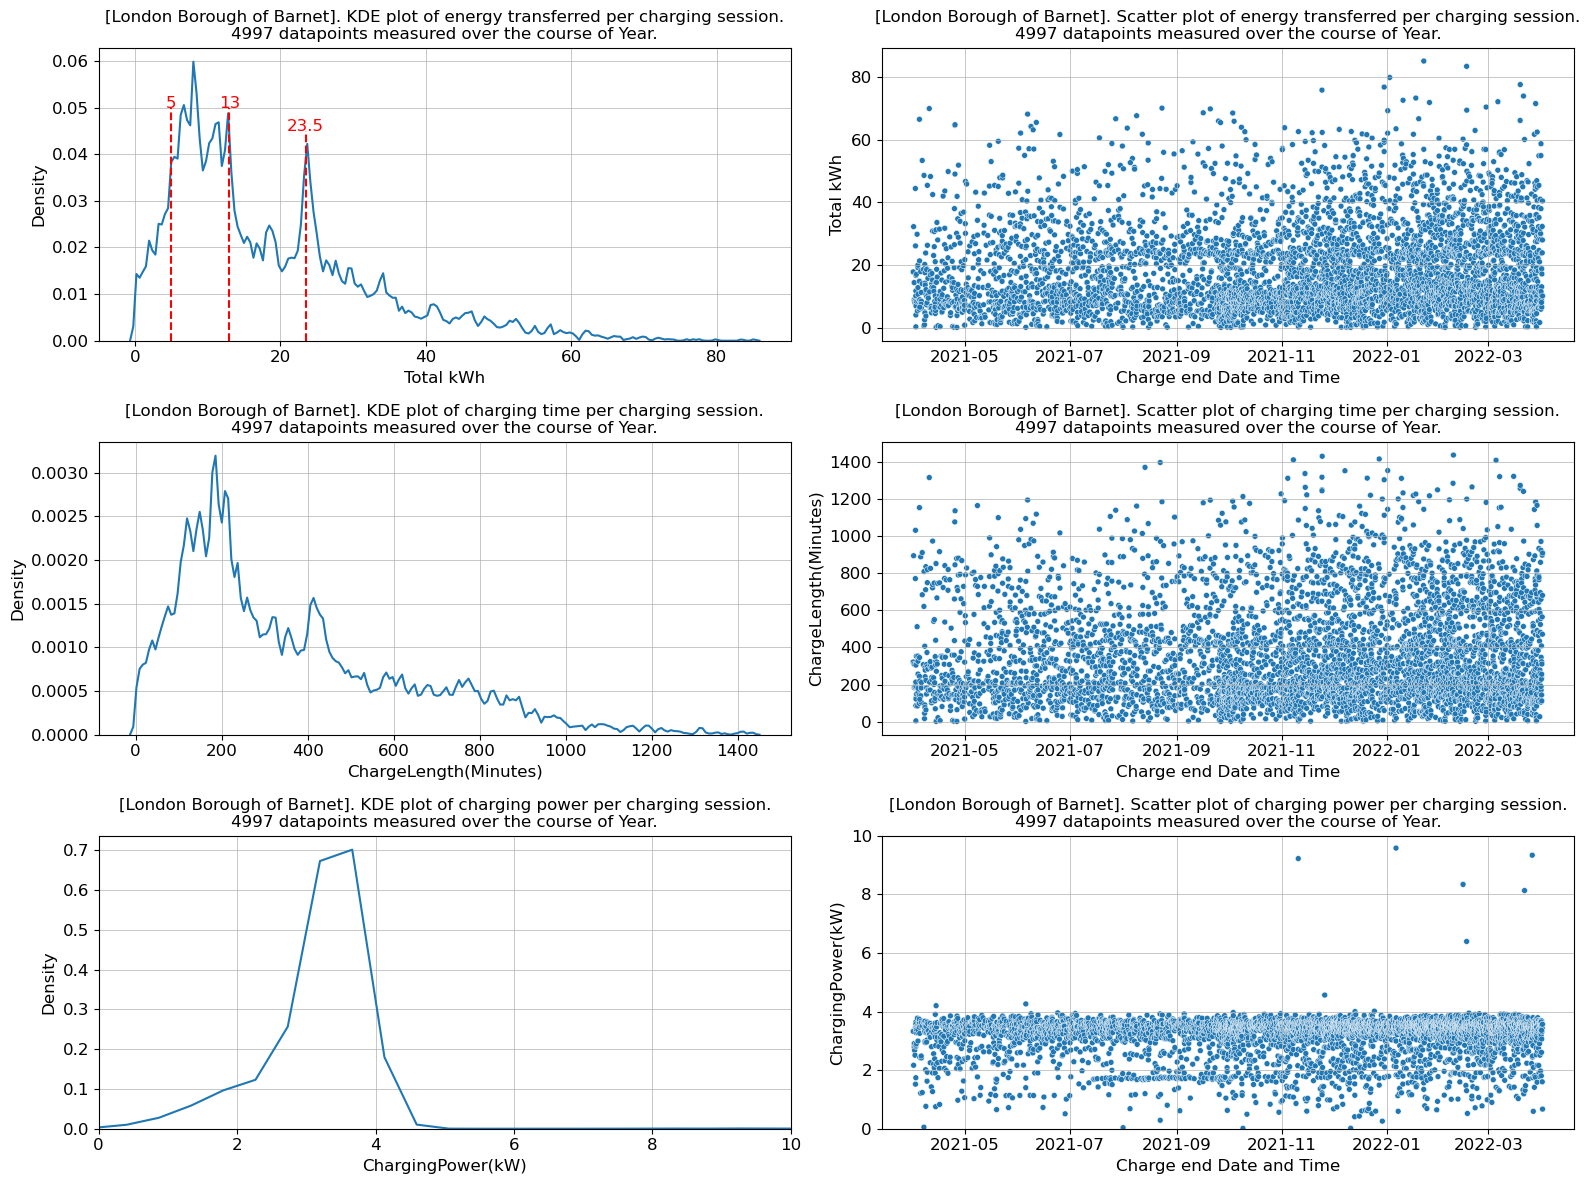

In [26]:
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
#
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.kdeplot(DataTable["Total kWh"],bw_adjust=0.1)
plt.title(f"[London Borough of Barnet]. KDE plot of energy transferred per charging session.\n{Datapoints} datapoints measured over the course of Year.")
plt.vlines(x=5, ymin=0, ymax=0.05, color='r', linestyle='--')
plt.vlines(x=13, ymin=0, ymax=0.05, color='r', linestyle='--')
plt.vlines(x=23.5, ymin=0, ymax=0.045, color='r', linestyle='--')
plt.text(x=5, y=0.05, s="5",color='r',fontsize=12,horizontalalignment='center')
plt.text(x=13, y=0.05, s="13",color='r',fontsize=12,horizontalalignment='center')
plt.text(x=23.5, y=0.045, s="23.5",color='r',fontsize=12,horizontalalignment='center')
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(3,2,2)
sns.scatterplot(DataTable,x="Charge end Date and Time",y="Total kWh",size=0.05,legend=False)
plt.title(f"[London Borough of Barnet]. Scatter plot of energy transferred per charging session.\n{Datapoints} datapoints measured over the course of Year.")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(3,2,3)
sns.kdeplot(DataTable["ChargeLength(Minutes)"],bw_adjust=0.1)
plt.title(f"[London Borough of Barnet]. KDE plot of charging time per charging session.\n{Datapoints} datapoints measured over the course of Year.")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(3,2,4)
sns.scatterplot(DataTable,x="Charge end Date and Time",y="ChargeLength(Minutes)",size=0.05,legend=False)
plt.title(f"[London Borough of Barnet]. Scatter plot of charging time per charging session.\n{Datapoints} datapoints measured over the course of Year.")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(3,2,5)
sns.kdeplot(DataTable["ChargingPower(kW)"])
plt.title(f"[London Borough of Barnet]. KDE plot of charging power per charging session.\n{Datapoints} datapoints measured over the course of Year.")
plt.xlim(0,10)
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(3,2,6)
sns.scatterplot(DataTable,x="Charge end Date and Time",y="ChargingPower(kW)",size=0.05,legend=False)
plt.title(f"[London Borough of Barnet]. Scatter plot of charging power per charging session.\n{Datapoints} datapoints measured over the course of Year.")
plt.ylim(0,10)
plt.grid(which='both',linewidth = 0.5)
plt.tight_layout()
#plt.savefig("LondonBoroughBarnt_EVCharging_Profiles.png")

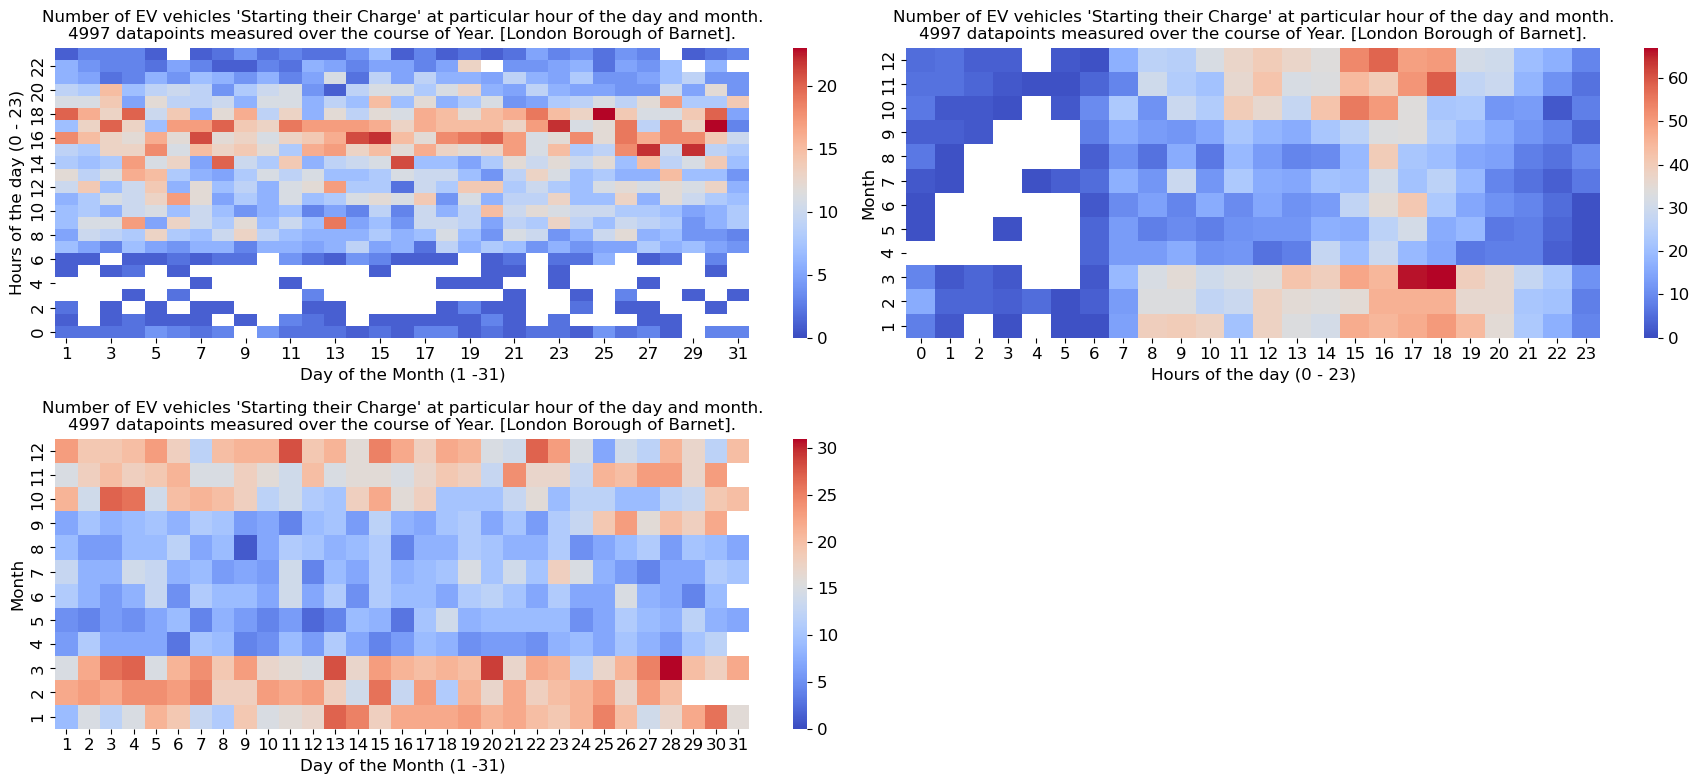

In [16]:
PivotTbl_HeatMaps1 = pd.pivot_table(DataTable, values='Total kWh', index=['Charge Start - Day'],columns=['Charge Start - Hour'],aggfunc='count')
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.heatmap(PivotTbl_HeatMaps1.transpose(),cmap='coolwarm',vmin=0)
plt.title(f"Number of EV vehicles 'Starting their Charge' at particular hour of the day and month.\n{Datapoints} datapoints measured over the course of Year. [London Borough of Barnet].")
plt.xlabel('Day of the Month (1 -31)')
plt.ylabel('Hours of the day (0 - 23)')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig("LondonBoroughBarnt_EVCharging_HeatMap_1.png")
#
PivotTbl_HeatMaps2 = pd.pivot_table(DataTable, values='Total kWh', index=['Charge Start - Month'],columns=['Charge Start - Hour'],aggfunc='count')
plt.subplot(2,2,2)
sns.heatmap(PivotTbl_HeatMaps2,cmap='coolwarm',vmin=0)
plt.title(f"Number of EV vehicles 'Starting their Charge' at particular hour of the day and month.\n{Datapoints} datapoints measured over the course of Year. [London Borough of Barnet].")
plt.ylabel('Month')
plt.xlabel('Hours of the day (0 - 23)')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig("LondonBoroughBarnt_EVCharging_HeatMap_2.png")
#
PivotTbl_HeatMaps3 = pd.pivot_table(DataTable, values='Total kWh', index=['Charge Start - Month'],columns=['Charge Start - Day'],aggfunc='count')
plt.subplot(2,2,3)
sns.heatmap(PivotTbl_HeatMaps3,cmap='coolwarm',vmin=0)
plt.title(f"Number of EV vehicles 'Starting their Charge' at particular hour of the day and month.\n{Datapoints} datapoints measured over the course of Year. [London Borough of Barnet].")
plt.ylabel('Month')
plt.xlabel('Day of the Month (1 -31)')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig("LondonBoroughBarnt_EVCharging_HeatMap_3.png")